# Introduction to Data Analysis with Siuba: Basics


In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)



## Introduction to Spotify data

In [2]:
#from IPython.display import HTML, display
music_top200

,country,position,track_name,artist,streams,duration,continent
0,Argentina,1,Tusa,KAROL G,1858666,200.960,Americas
1,Argentina,2,Tattoo,Rauw Alejandro,1344382,202.887,Americas
2,Argentina,3,Hola - Remix,Dalex,1330011,249.520,Americas
...,...,...,...,...,...,...,...
12397,South Africa,198,Black And White,Niall Horan,11771,193.090,Africa
12398,South Africa,199,When I See U,Fantasia,11752,217.347,Africa
12399,South Africa,200,Psycho!,MASN,11743,197.217,Africa


> 🔎 How many streams did the track named Blinding lights get this week?

> 🔎 How many rows in the 12,417 row DataFrame are being shown above?

> 🔎 What is the speechiness level of the track named Myron?

<details>
    <summary>show answers</summary>

    * Blinding lights was streamed 7744570 times.
    * 10 rows are being shown from the DataFrame
    * The track named Myron has a speechiness of 0.29
</details>
    

## What you'll learn to do

In this tutorial you will learn about..

* data that is represented in table called a DataFrame.
* how to arrange rows and select columns.
* how to create new columns and cut out specific rows.

The next two examples show what you'll be able to do by the end of this chapter.
It's okay if the code doesn't make sense yet.
Just being able to run someone else's code goes a long way!


### Big example 1: finding high energy hits

Run the code below. It should do the following:

* **arrange** the rows--first by position (lowest first), and second by energy (highest first).
* **select** specific columns, such as country, position, and artist.

In [3]:
(music_top200
  >> arrange(_.position, _.duration)
  >> select(_.country, _.position, _.artist, _.track_name, _.duration)
)

,country,position,artist,track_name,duration
2600,Germany,1,Ufo361,"Bad Girls, Good Vibes",107.446
4400,Greece,1,Snik,Drip,147.429
2000,Colombia,1,J Balvin,Rojo,150.720
...,...,...,...,...,...
11999,Uruguay,200,Callejeros,Creo,289.760
3999,Finland,200,Eminem,Without Me,290.320
4399,United Kingdom,200,TOTO,Africa,295.893


Try doing the actions below, and then running the code.

> 🔨 Try changing the two uses of `_.energy` above to `_.danciness`.

### Big example 2: which countries does an artist have hits in?

Run the code below. It should do the following:

* **filter** to keep rows for the artist ITZY
* use **ggplot** to add a point for each row in the filtered data.

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


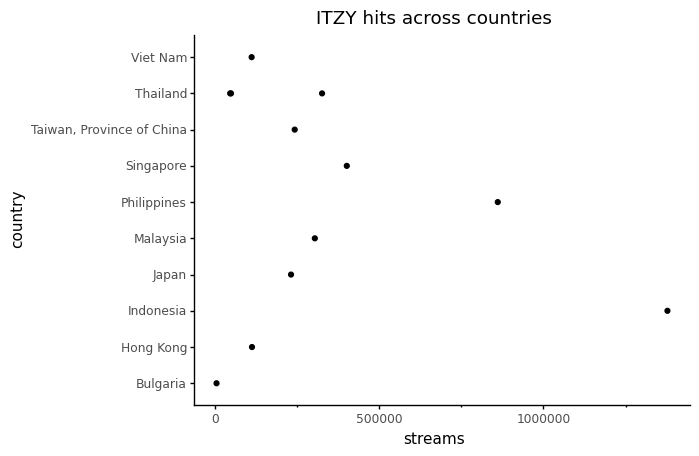

<ggplot: (292078796)>

In [4]:
(music_top200
  >> filter(_.artist == "ITZY")
  >> ggplot(aes("streams", "country")) + geom_point() + labs(title = "ITZY hits across countries")
)

> 🔨 Try changing the term `"ITZY"` to `"TIX"`. How many countries have TIX hits?

> 🔨 Try stopping the plot with a comment. That is, put `#` to the left of `>> ggplot`. This should show you the raw data.

<details>
    <summary>solution</summary>

Here is the solution code...
    
```python
# code with artist changed, and plot commented out
(music_top200
  >> filter(_.artist == "TIX")
  #>> ggplot(aes("streams", "country")) + geom_point() + labs(title = "ITZY hits across countries")
)
```

</details>